In [1]:
# Dependencies

import pandas as pd
import requests
import json
import pprint
import numpy as np
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
from us import states


# Census & gmaps API Keys
from config import (api_key, gkey)
year = 2012
c = Census(api_key, year)

# Configure gmaps
gmaps.configure(api_key=gkey)


In [2]:
datalst = []

In [3]:
for year in range(2012, 2018):
    c = Census(api_key, year) 

    data = c.acs5.get(('NAME', "B25077_001E","B25064_001E", "B15003_022E","B19013_001E"), 
                      {'for': 'zip code tabulation area:*'}) 

    cleandata = (pd.DataFrame(data) 
                   .rename(columns={"NAME": "Name", 
                                    "zip code tabulation area": "Zipcode", 
                                    "B25077_001E": "Median_Home_Value", 
                                    "B25064_001E": "Median_Rent", 
                                    "B15003_022E": "Bachelor_Degrees", 
                                    "B19013_001E": "Median_Income"}) 
                   .astype({'Zipcode':'int64'}) 
                   .query('(Median_Home_Value > 0) & (Median_Rent > 0) & (Median_Income > 0)')
                   .dropna()
                   .assign(Year = year)
                 )

    datalst.append(cleandata)


final_data = pd.concat(datalst, ignore_index = True)
final_data.head()

,Name,Median_Home_Value,Median_Rent,Bachelor_Degrees,Median_Income,Zipcode,Year
0,ZCTA5 02322,310500.0,1131.0,456.0,70481.0,2322,2012
1,ZCTA5 02324,333900.0,1144.0,3856.0,90722.0,2324,2012
2,ZCTA5 02330,269100.0,1547.0,1178.0,67963.0,2330,2012
3,ZCTA5 02332,573900.0,957.0,3949.0,117197.0,2332,2012
4,ZCTA5 02333,325700.0,993.0,1430.0,80169.0,2333,2012


In [4]:
#Seperate DF By Year
data2012 = final_data.query('(Year == 2012)')
data2013 =final_data.query('(Year == 2013)')
data2014 =final_data.query('(Year == 2014)')
data2015 =final_data.query('(Year == 2015)')
data2016 =final_data.query('(Year == 2016)')
data2017 =final_data.query('(Year == 2017)')

In [5]:
#Change DF
mergerdf = data2012.merge(data2017,how='outer',on='Name',suffixes=('_2012','_2017'))

In [6]:
mergedf = mergerdf.dropna()

In [7]:
mergedf.head()

,Name,Median_Home_Value_2012,Median_Rent_2012,Bachelor_Degrees_2012,Median_Income_2012,Zipcode_2012,Year_2012,Median_Home_Value_2017,Median_Rent_2017,Bachelor_Degrees_2017,Median_Income_2017,Zipcode_2017,Year_2017
0,ZCTA5 02322,310500.0,1131.0,456.0,70481.0,2322.0,2012.0,294900.0,1116.0,697.0,69709.0,2322.0,2017.0
1,ZCTA5 02324,333900.0,1144.0,3856.0,90722.0,2324.0,2012.0,338000.0,1385.0,3700.0,88640.0,2324.0,2017.0
2,ZCTA5 02330,269100.0,1547.0,1178.0,67963.0,2330.0,2012.0,274600.0,1319.0,1066.0,73904.0,2330.0,2017.0
3,ZCTA5 02332,573900.0,957.0,3949.0,117197.0,2332.0,2012.0,594000.0,2176.0,4124.0,123613.0,2332.0,2017.0
4,ZCTA5 02333,325700.0,993.0,1430.0,80169.0,2333.0,2012.0,321600.0,1148.0,1691.0,86568.0,2333.0,2017.0


In [8]:
#Change in Home Value
mergedf['Change_In_Value']=(mergedf['Median_Home_Value_2017']-mergedf['Median_Home_Value_2012'])/(mergedf['Median_Home_Value_2012'])

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
#Change in Rent
mergedf['Change_In_Rent']=(mergedf['Median_Rent_2017']-mergedf['Median_Rent_2012'])/(mergedf['Median_Rent_2012'])

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
#Change in Degree
mergedf['Change_In_Degree']=(mergedf['Bachelor_Degrees_2017']-mergedf['Bachelor_Degrees_2012'])/(mergedf['Bachelor_Degrees_2012'])

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
#Change in Income
mergedf['Change_In_Income']=(mergedf['Median_Income_2017']-mergedf['Median_Income_2012'])/(mergedf['Median_Income_2012'])

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
mergedf.head()

,Name,Median_Home_Value_2012,Median_Rent_2012,Bachelor_Degrees_2012,Median_Income_2012,Zipcode_2012,Year_2012,Median_Home_Value_2017,Median_Rent_2017,Bachelor_Degrees_2017,Median_Income_2017,Zipcode_2017,Year_2017,Change_In_Value,Change_In_Rent,Change_In_Degree,Change_In_Income
0,ZCTA5 02322,310500.0,1131.0,456.0,70481.0,2322.0,2012.0,294900.0,1116.0,697.0,69709.0,2322.0,2017.0,-0.050242,-0.013263,0.528509,-0.010953
1,ZCTA5 02324,333900.0,1144.0,3856.0,90722.0,2324.0,2012.0,338000.0,1385.0,3700.0,88640.0,2324.0,2017.0,0.012279,0.210664,-0.040456,-0.022949
2,ZCTA5 02330,269100.0,1547.0,1178.0,67963.0,2330.0,2012.0,274600.0,1319.0,1066.0,73904.0,2330.0,2017.0,0.020438,-0.147382,-0.095076,0.087415
3,ZCTA5 02332,573900.0,957.0,3949.0,117197.0,2332.0,2012.0,594000.0,2176.0,4124.0,123613.0,2332.0,2017.0,0.035024,1.273772,0.044315,0.054745
4,ZCTA5 02333,325700.0,993.0,1430.0,80169.0,2333.0,2012.0,321600.0,1148.0,1691.0,86568.0,2333.0,2017.0,-0.012588,0.156093,0.182517,0.079819


In [13]:
#Change in Percent Data Frame
changedf = mergedf[['Zipcode_2012','Name','Change_In_Value','Change_In_Income','Change_In_Degree','Change_In_Rent']]

In [14]:
changedf = changedf.rename(columns = {'Zipcode_2012':'Zipcode'}).astype({'Zipcode':'int64'})

In [15]:
####formatteddf = changedf.style.format({'Change_In_Value': "{:.2%}",'Change_In_Rent': "{:.2%}",'Change_In_Degree': "{:.2%}"})

In [16]:
changedf.head()

,Zipcode,Name,Change_In_Value,Change_In_Income,Change_In_Degree,Change_In_Rent
0,2322,ZCTA5 02322,-0.050242,-0.010953,0.528509,-0.013263
1,2324,ZCTA5 02324,0.012279,-0.022949,-0.040456,0.210664
2,2330,ZCTA5 02330,0.020438,0.087415,-0.095076,-0.147382
3,2332,ZCTA5 02332,0.035024,0.054745,0.044315,1.273772
4,2333,ZCTA5 02333,-0.012588,0.079819,0.182517,0.156093


In [17]:
# Source for base data (changes from 2000 to 2016): 
# https://www.multifamilyexecutive.com/property-management/demographics/the-nations-most-gentrified-neighborhoods_o
base = {'Zipcode': [90014, 20001, 77003, 19123, 10039, 
                    76102, 11211, 19146, 11222, 11216,
                    63103, 90013, 78702, 11237, 10026, 
                    21224, 11221, 20010, 77007, 98402],
       'Change_In_Value': [707, 207, 284, 203, 356, 
                           323, 167, 404, 116, 194, 
                           250, 133, 212, 111, 219, 
                           107, 130, 146, 107, 103],
       'Change_In_Income': [95, 163, 71, 95, 32, 
                            103, 79, 51, 56, 48,
                            44, 77, 47, 43, 65, 
                            43, 39, 48, 114, 83],
       'Change_In_Degree': [857, 212, 443, 230, 168, 
                            122, 95, 106, 97, 149, 
                            153, 199, 201, 125, 92, 
                            109, 100, 84, 188, 141]}
base_df = pd.DataFrame(base)
base_df.head()

,Zipcode,Change_In_Value,Change_In_Income,Change_In_Degree
0,90014,707,95,857
1,20001,207,163,212
2,77003,284,71,443
3,19123,203,95,230
4,10039,356,32,168


In [18]:
#Create a data frame of zip codes that fit criteria or potential gentrification (22 Zip codes)
gent_df = changedf.loc[(changedf['Change_In_Value'] >= 1) & 
                       (changedf['Change_In_Income'] >= 0.4) & 
                       (changedf['Change_In_Degree'] >= 0.9)]
gent_df['Change_In_Value'] = (gent_df['Change_In_Value']*100).round()
gent_df['Change_In_Income'] = (gent_df['Change_In_Income']*100).round()
gent_df['Change_In_Degree'] = (gent_df['Change_In_Degree']*100).round()
gent_df['Change_In_Rent'] = (gent_df['Change_In_Rent']*100).round()
gent_df.head()

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Zipcode,Name,Change_In_Value,Change_In_Income,Change_In_Degree,Change_In_Rent
4683,24093,ZCTA5 24093,163.0,93.0,100.0,58.0
5153,26039,ZCTA5 26039,116.0,48.0,395.0,39.0
7730,34785,ZCTA5 34785,223.0,55.0,280.0,25.0
8999,38944,ZCTA5 38944,138.0,83.0,211.0,-48.0
9819,29826,ZCTA5 29826,267.0,65.0,inf,-24.0


In [19]:
#Create a data frame of zip codes that do not fit potential gentrification criteria (also does not include base zip codes)
nongent_df = changedf.loc[((changedf['Change_In_Value'] < 1) | 
                       (changedf['Change_In_Income'] < 0.4) | 
                       (changedf['Change_In_Degree'] < 0.9)) & 
                          (changedf['Zipcode'] != (90014 | 20001 | 77003 | 19123 | 10039 | 
                                                   76102 | 11211 | 19146 | 11222 | 11216 | 
                                                   63103 | 90013 | 78702 | 11237 | 10026 | 
                                                   21224 | 11221 | 20010 | 77007 | 98402))]
nongent_df['Change_In_Value'] = (nongent_df['Change_In_Value']*100).round()
nongent_df['Change_In_Income'] = (nongent_df['Change_In_Income']*100).round()
nongent_df['Change_In_Degree'] = (nongent_df['Change_In_Degree']*100).round()
nongent_df['Change_In_Rent'] = (nongent_df['Change_In_Rent']*100).round()
nongent_df.head()

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Zipcode,Name,Change_In_Value,Change_In_Income,Change_In_Degree,Change_In_Rent
0,2322,ZCTA5 02322,-5.0,-1.0,53.0,-1.0
1,2324,ZCTA5 02324,1.0,-2.0,-4.0,21.0
2,2330,ZCTA5 02330,2.0,9.0,-10.0,-15.0
3,2332,ZCTA5 02332,4.0,5.0,4.0,127.0
4,2333,ZCTA5 02333,-1.0,8.0,18.0,16.0


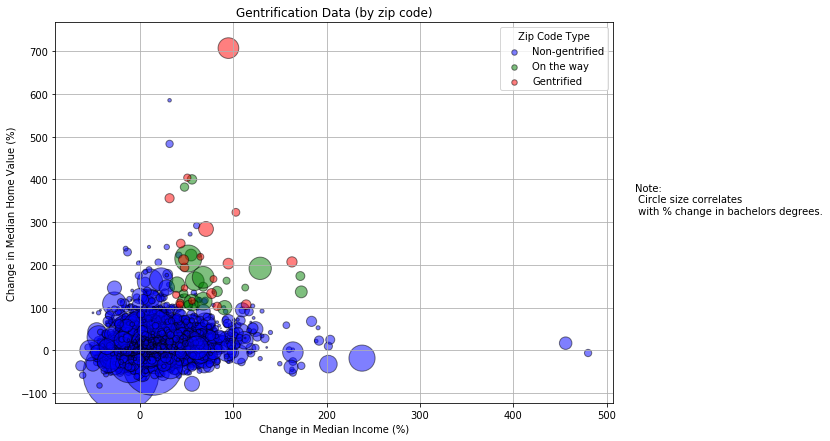

In [34]:
# Build the scatter plots for base, nongent, and 'predictive' zipcodes
nongentIncX = nongent_df['Change_In_Income']
gentIncX = gent_df['Change_In_Income']
baseIncX = base_df['Change_In_Income']
nongentValY = nongent_df['Change_In_Value']
gentValY = gent_df['Change_In_Value']
baseValY = base_df['Change_In_Value']

plt.figure(figsize=(10,7))
plt.scatter(nongentIncX, nongentValY, marker="o", s=(nongent_df['Change_In_Degree']/2), facecolors='blue', 
            edgecolors="black", alpha=0.5, label='Non-gentrified')
plt.scatter(gentIncX, gentValY, marker="o", s=(gent_df['Change_In_Degree']/2), facecolors='green', 
            edgecolors="black", alpha=0.5, label='On the way')
plt.scatter(baseIncX, baseValY, marker="o", s=(base_df['Change_In_Degree']/2), facecolors='red', 
            edgecolors="black", alpha=0.5, label='Gentrified')

plt.title("Gentrification Data (by zip code)")
plt.xlabel("Change in Median Income (%)")
plt.ylabel("Change in Median Home Value (%)")
plt.grid()

lgnd = plt.legend(loc="upper right", title="Zip Code Type")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

side_text = plt.figtext(0.93, 0.5, 'Note: \n Circle size correlates \n with % change in bachelors degrees.')
plt.savefig("../Whole_Lotta_Rosie/gentScatter.png", bbox_inches='tight')

In [21]:
#Avg changes (all zips)
aGrad= round(((sum(mergedf['Bachelor_Degrees_2017'])-sum(mergedf['Bachelor_Degrees_2012']))/sum(mergedf['Bachelor_Degrees_2012']))*100, 2)
aVals = round((changedf['Change_In_Value'].mean()*100), 2)
aInc = round((changedf['Change_In_Income'].mean()*100), 2)


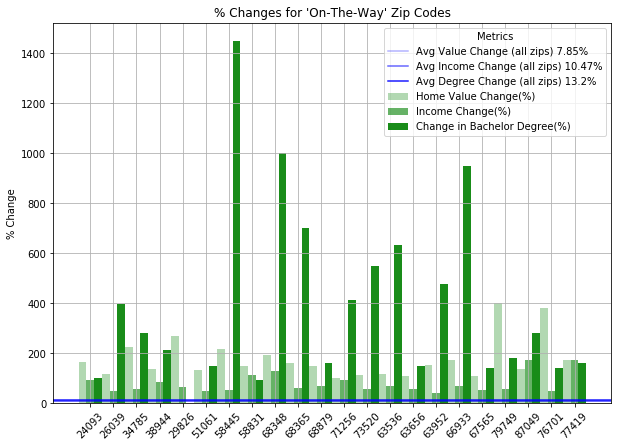

In [36]:
#Build a bar chart for potential gentrified zip codes
#also display avg changes for all zip codes
x_axis = np.arange(len(gent_df['Zipcode']))
vals = gent_df['Change_In_Value']
inc = gent_df['Change_In_Income']
grad = gent_df['Change_In_Degree']
width = (1/3)

fig, ax = plt.subplots(figsize=(10,7))

valChng = ax.bar(x_axis - width, vals, width, align="center", color='green', alpha=0.3, label='Home Value Change(%)')
incChng = ax.bar(x_axis, inc, width, align="center", color='green', alpha=0.6, label='Income Change(%)')
gradChng = ax.bar(x_axis + width, grad, width, align="center", color='green', alpha=0.9, label='Change in Bachelor Degree(%)')
ax.set_xticks(x_axis)
plt.axhline(y=aVals, label=f'Avg Value Change (all zips) {aVals}%', color='blue', alpha=0.3)
plt.axhline(y=aInc, label=f'Avg Income Change (all zips) {aInc}%', color='blue', alpha=0.6)
plt.axhline(y=aGrad, label=f'Avg Degree Change (all zips) {aGrad}%', color='blue', alpha=0.9)

plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, gent_df['Zipcode'], rotation=45)
plt.title("% Changes for 'On-The-Way' Zip Codes")
plt.ylabel("% Change")
lgnd = plt.legend(loc="upper right", title="Metrics")
plt.savefig("../Whole_Lotta_Rosie/gentPerChange.png", bbox_inches='tight')

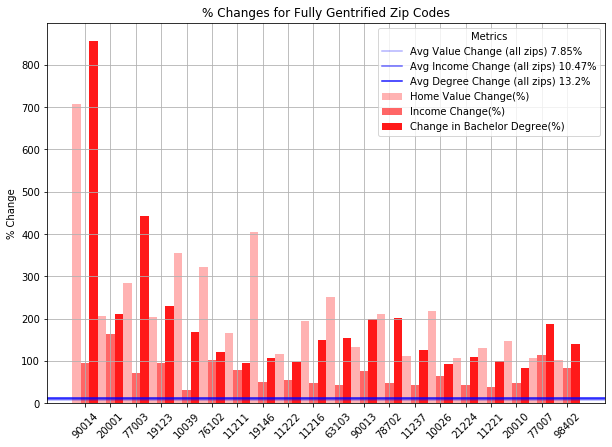

In [37]:
#Build a bar chart for potential gentrified zip codes
#also display avg changes for all zip codes
x_axis = np.arange(len(base_df['Zipcode']))
vals = base_df['Change_In_Value']
inc = base_df['Change_In_Income']
grad = base_df['Change_In_Degree']
width = (1/3)

fig, ax = plt.subplots(figsize=(10,7))

valChng = ax.bar(x_axis - width, vals, width, align="center", color='red', alpha=0.3, label='Home Value Change(%)')
incChng = ax.bar(x_axis, inc, width, align="center", color='red', alpha=0.6, label='Income Change(%)')
gradChng = ax.bar(x_axis + width, grad, width, align="center", color='red', alpha=0.9, label='Change in Bachelor Degree(%)')
ax.set_xticks(x_axis)
plt.axhline(y=aVals, label=f'Avg Value Change (all zips) {aVals}%', color='blue', alpha=0.3)
plt.axhline(y=aInc, label=f'Avg Income Change (all zips) {aInc}%', color='blue', alpha=0.6)
plt.axhline(y=aGrad, label=f'Avg Degree Change (all zips) {aGrad}%', color='blue', alpha=0.9)

plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, base_df['Zipcode'], rotation=45)
plt.title("% Changes for Fully Gentrified Zip Codes")
plt.ylabel("% Change")
lgnd = plt.legend(loc="upper right", title="Metrics")
plt.savefig("../Whole_Lotta_Rosie/gentAvgChange.png", bbox_inches='tight')

In [24]:
import pgeocode
import ipywidgets

#HEATMAPS FOR CITIES THAT MEET THE CRITERIA FOR GENTRIFICATION
gent_df.head()

,Zipcode,Name,Change_In_Value,Change_In_Income,Change_In_Degree,Change_In_Rent
4683,24093,ZCTA5 24093,163.0,93.0,100.0,58.0
5153,26039,ZCTA5 26039,116.0,48.0,395.0,39.0
7730,34785,ZCTA5 34785,223.0,55.0,280.0,25.0
8999,38944,ZCTA5 38944,138.0,83.0,211.0,-48.0
9819,29826,ZCTA5 29826,267.0,65.0,inf,-24.0


In [25]:
lat = []
lng = []
nomi = pgeocode.Nominatim('us')
test31 = nomi.query_postal_code('02322')

for zips in gent_df['Zipcode']:
     test31 = nomi.query_postal_code(str(zips))
        
     lat.append(test31[9])
     lng.append(test31[10])

gent_df['lat'] = lat
gent_df['lng'] = lng

gent_df = gent_df.dropna()

gent_df.head()

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Zipcode,Name,Change_In_Value,Change_In_Income,Change_In_Degree,Change_In_Rent,lat,lng
4683,24093,ZCTA5 24093,163.0,93.0,100.0,58.0,37.3669,-80.8634
5153,26039,ZCTA5 26039,116.0,48.0,395.0,39.0,39.8531,-80.6661
7730,34785,ZCTA5 34785,223.0,55.0,280.0,25.0,28.8454,-82.0347
8999,38944,ZCTA5 38944,138.0,83.0,211.0,-48.0,33.7515,-90.3133
9819,29826,ZCTA5 29826,267.0,65.0,inf,-24.0,33.3804,-81.3796


In [26]:
#Heatmap1 = Home Value

locations = gent_df[["lat", "lng"]].astype(float)
home_val = gent_df["Change_In_Value"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=home_val, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [27]:
#Heatmap2 = Bachelor's Degrees

locations = gent_df[["lat", "lng"]].astype(float)
bach_degree = gent_df["Change_In_Degree"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=bach_degree, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [28]:
#Heatmap3 = Income

locations = gent_df[["lat", "lng"]].astype(float)
chg_income = gent_df["Change_In_Income"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=chg_income, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
#HEATMAPS FOR CITIES THAT DO NOT MEET THE CRITERIA FOR GENTRIFICATION
nongent_df.head()

,Zipcode,Name,Change_In_Value,Change_In_Income,Change_In_Degree,Change_In_Rent
0,2322,ZCTA5 02322,-5.0,-1.0,53.0,-1.0
1,2324,ZCTA5 02324,1.0,-2.0,-4.0,21.0
2,2330,ZCTA5 02330,2.0,9.0,-10.0,-15.0
3,2332,ZCTA5 02332,4.0,5.0,4.0,127.0
4,2333,ZCTA5 02333,-1.0,8.0,18.0,16.0


In [30]:
split_frame = nongent_df['Name'] = nongent_df.Name.str.split(" ", n=1, expand=True)
split_frame.head()

C:\Users\Rosie\Anaconda3\envs\MyPyEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,1
0,ZCTA5,02322
1,ZCTA5,02324
2,ZCTA5,02330
3,ZCTA5,02332
4,ZCTA5,02333


In [31]:
column_names = split_frame.set_names(['zip', 'code'], inplace=True)

split_frame.columns = column_names

AttributeError: 'DataFrame' object has no attribute 'set_names'

In [ ]:
split_frame['Change_In_Value'] = nongent_df['Change_In_Value']
split_frame['Change_In_Income'] = nongent_df['Change_In_Income']
split_frame['Change_In_Degree'] = nongent_df['Change_In_Degree']
split_frame['Change_In_Rent'] = nongent_df['Change_In_Rent']

split_frame.head()

In [ ]:
lat = []
lng = []
nomi = pgeocode.Nominatim('us')
test32 = nomi.query_postal_code('02322')

for zips in split_frame['1']:
     test32 = nomi.query_postal_code(str(zips))
        
     lat.append(test32[9])
     lng.append(test32[10])

split_frame['lat'] = lat
split_frame['lng'] = lng

split_frame = split_frame.dropna()

split_frame.head()